<img src='pics/otus.png'>

In [1]:
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import math

from sklearn.decomposition import PCA

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

## 0. Выберите любой датасет, связанный с медицинской тематикой.

# 1. Провести EDA
Просмотреть структуру данных, значения каждого признака, поискать особенности в признаках и в данных вцелом

In [2]:
survey = pd.read_csv('survey.csv')
survey.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [3]:
df = survey.drop([
    'Timestamp', 'comments'
], axis=1)

for i, column in enumerate(df.columns):
    if df.dtypes[i] == 'object':
        display(column, df[column].value_counts())
    else:
        display(column, df[column].describe())

'Age'

count          1259.00
mean       79428148.31
std      2818299442.98
min           -1726.00
25%              27.00
50%              31.00
75%              36.00
max     99999999999.00
Name: Age, dtype: float64

'Gender'

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Female (trans)                                      2
Cis Male                                            2
Man                                                 2
cis male                                            1
fluid                                               1
non-binary                                          1
Guy (-ish) ^_^              

'Country'

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Italy                       7
Sweden                      7
Belgium                     6
Brazil                      6
South Africa                6
Israel                      5
Bulgaria                    4
Singapore                   4
Russia                      3
Mexico                      3
Finland                     3
Austria                     3
Greece                      2
Denmark                     2
Croatia                     2
Portugal                    2
Colombia                    2
Romania                     1
Latvia                      1
Slovenia                    1
Costa Rica                  1
Japan     

'state'

CA    138
WA     70
NY     57
TN     45
TX     44
OH     30
IL     29
OR     29
PA     29
IN     27
MI     22
MN     21
MA     20
FL     15
NC     14
VA     14
WI     12
MO     12
GA     12
UT     11
CO      9
MD      8
AL      8
AZ      7
OK      6
NJ      6
SC      5
KY      5
IA      4
CT      4
DC      4
KS      3
VT      3
NH      3
SD      3
NV      3
NM      2
WY      2
NE      2
RI      1
ID      1
ME      1
LA      1
MS      1
WV      1
Name: state, dtype: int64

'self_employed'

No     1095
Yes     146
Name: self_employed, dtype: int64

'family_history'

No     767
Yes    492
Name: family_history, dtype: int64

'treatment'

Yes    637
No     622
Name: treatment, dtype: int64

'work_interfere'

Sometimes    465
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

'no_employees'

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

'remote_work'

No     883
Yes    376
Name: remote_work, dtype: int64

'tech_company'

Yes    1031
No      228
Name: tech_company, dtype: int64

'benefits'

Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

'care_options'

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

'wellness_program'

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

'seek_help'

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

'anonymity'

Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

'leave'

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

'mental_health_consequence'

No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

'phys_health_consequence'

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

'coworkers'

Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

'supervisor'

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

'mental_health_interview'

No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

'phys_health_interview'

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

'mental_vs_physical'

Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

'obs_consequence'

No     1075
Yes     184
Name: obs_consequence, dtype: int64

# 2. Спланировать эксперимент 

Эксперимент - составить план, по которому будет проделана исследовательская работа. Примерные пункты плана:
* Составить первичный список признаков, необходимых для решения задачи
* Нормализовать выбранные признаки
* Сгенерировать список новых признаков, которые можно получить из данных
* Применить понижение размерности для визуализации данных
* Применить кластеризацию, визуализировать
* Описание кластера

В качестве темы выбрана связь между факторами зависящими от респондента и его семьи и полом и возрастом. 

Отобраны следующие признаки:
* Age - возраст
* Gender - половая принадлежность
* treatment - Факт наличия случая обращения за врачебной помощью
* family_history - Факт наличия случаев заболения у семьи
* work_interfere - Степень влияние на работу

В возрасте имются выбросы которые необходимо отсечь.
Половоя принадлежность должна быть приведена к большему единообразию

Часть признаков являются категориальными поэтому требуется формирование производных признаков на их основе при помощи One Hot кодивания.

Выбрано снижение размерности до двух признаков.

Кластеризация должна быть выполнения при помощи DBScan.

Скопления должны быть изучены на предмет характерных черт.

# 3. Выполнить подготовку данных для построения модели

Выполнить необходимые преобразования данных

In [4]:
df['Gender'] = df['Gender'].map(lambda gender: {
    'm': 'male', 'male': 'male', 'man': 'male',
    'f': 'male', 'female': 'female', 'woman': 'female',
}.get(gender.lower(), 'other'))
df['Gender'] = pd.Categorical(df['Gender'])

df = df[df['Age'].between(0, 153)]

features = [
    'Age', 
    'Gender',
    
    'family_history',
    'treatment',
    'work_interfere',
]

pipeline = Pipeline(steps = [
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
])

df = df.loc[:, features].dropna()

X_prepared = pipeline.fit_transform(df)

# 4. Провести построение модели 

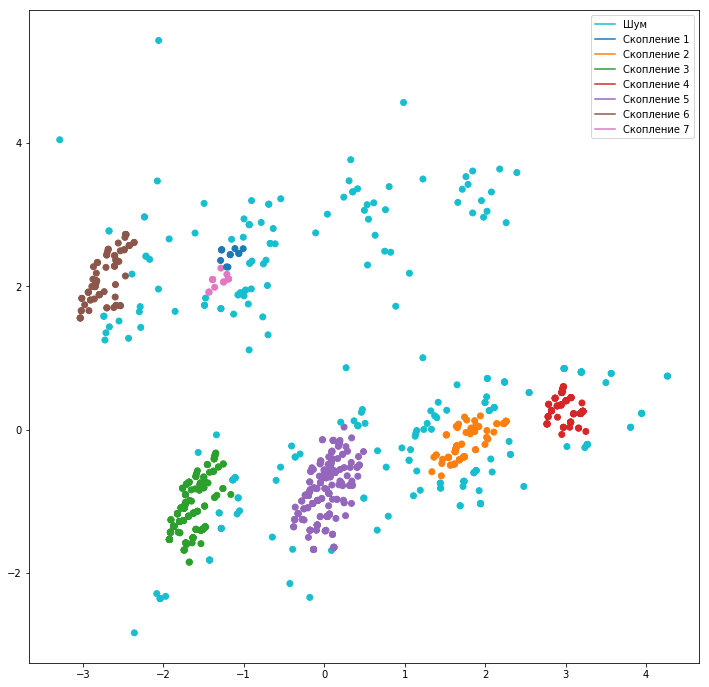

In [5]:
from sklearn.cluster import DBSCAN

import matplotlib.lines as mlines


dbscan = DBSCAN(eps=0.20, min_samples=12).fit(X_prepared)
clusters = dbscan.labels_

df['first'] = X_prepared[:, 0]
df['second'] = X_prepared[:, 1]
df['cluster'] = clusters
df['count'] = 1

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

prop_cycle = plt.rcParams['axes.prop_cycle']
colors_cycle = prop_cycle.by_key()['color']
colors_map = {cluster: colors_cycle[cluster % len(colors_cycle)] for cluster in df['cluster']}
colors = [colors_map[cluster] for cluster in df['cluster']]

artists = ax.scatter(df['first'], df['second'], c=colors)
clusters = df['cluster'].unique()
handles = [
    mlines.Line2D([], [], color=colors_map[cluster], label=(f'Скопление {cluster + 1}' if cluster != -1 else 'Шум'))
    for cluster in sorted(clusters)
]
plt.legend(handles=handles)

# 5. Проанализировать результат
получилось или нет, почему, что можно улучшить, можно ли интерпретировать результат

Text(0.5, 0.98, 'Распределение по факторам риска в зависимости от кластера')

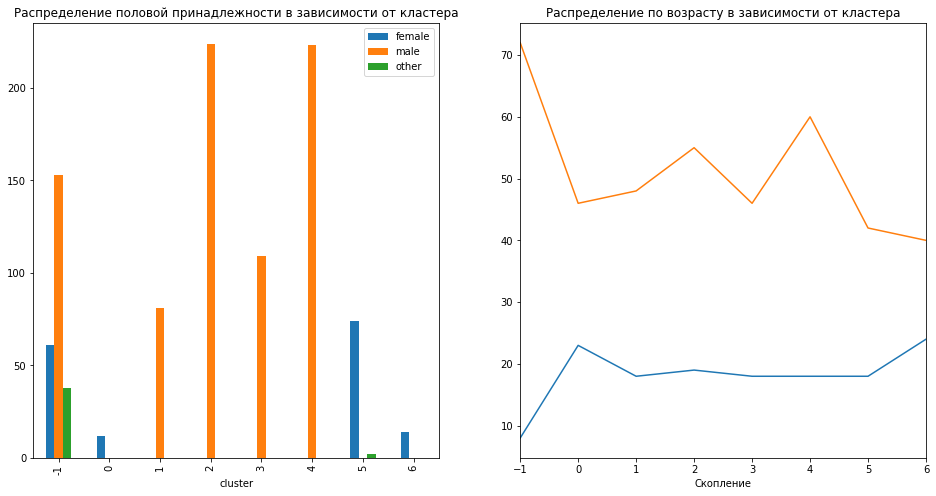

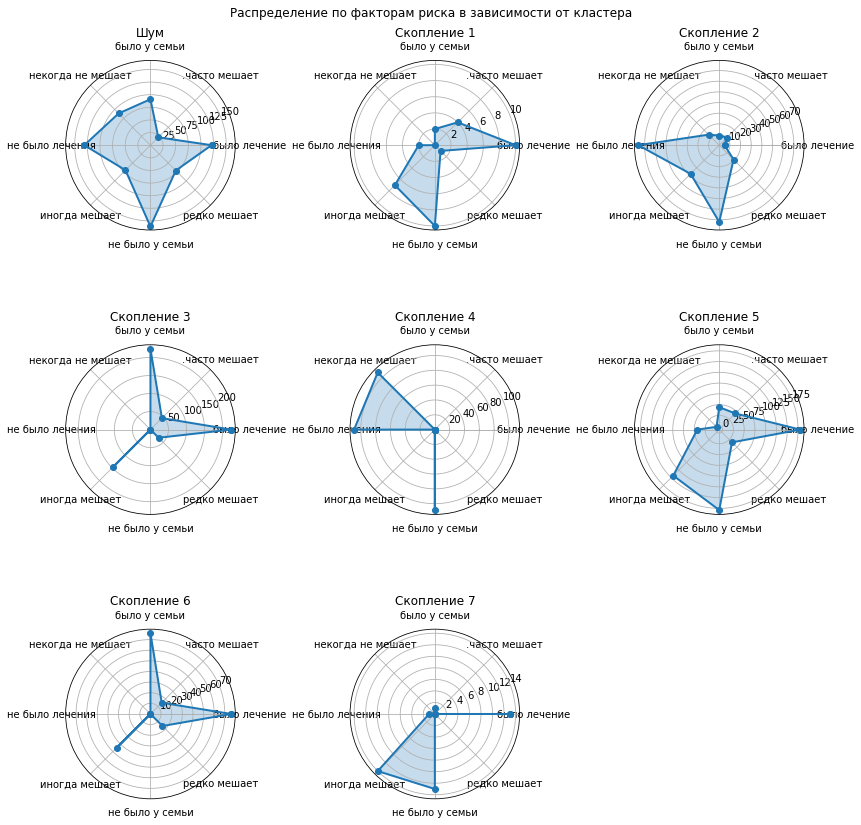

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

gendered = df.copy()
gendered['count'] = 1
genders = pd.DataFrame({
    gender: gendered[gendered['Gender'] == gender]['count'] 
    for gender in gendered['Gender'].unique()
}).fillna(0)
genders['cluster'] = gendered['cluster']
genders.groupby(['cluster']).sum().plot.bar(ax=ax[0])
ax[0].set_title('Распределение половой принадлежности в зависимости от кластера')
plt.xlabel('Скопление')

df.groupby(['cluster']).min()['Age'].plot.line(ax=ax[1], label='Минимальный возраст')
df.groupby(['cluster']).max()['Age'].plot.line(ax=ax[1], label='Максимальный возраст')
ax[1].set_title('Распределение по возрасту в зависимости от кластера')
plt.xlabel('Скопление')


fig=plt.figure(figsize=(12, 12))

by_cluster = df.groupby(['cluster'])
for i, cluster in enumerate(list(df.groupby('cluster').indices)):
    labels = []
    stats = []

    for question, answer, label in [
            ('treatment', 'Yes', 'было лечение'),
            ('work_interfere', 'Often', '.часто мешает'),
            ('family_history', 'Yes', 'было у семьи'),
            ('work_interfere', 'Never', 'некогда не мешает'),
            ('treatment', 'No', 'не было лечения'),
            ('work_interfere', 'Sometimes', 'иногда мешает'),
            ('family_history', 'No', 'не было у семьи'),
            ('work_interfere', 'Rarely', 'редко мешает'),
    ]:
        labels.append(label)
        if cluster in by_cluster[question].value_counts().index.levels[0]:
            if answer in by_cluster[question].value_counts()[cluster].index:
                stats.append(by_cluster[question].value_counts()[cluster, answer])
            else:
                stats.append(0)
        else:
            stats.append(0)
    
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    n_clusters = len(list(df.groupby('cluster').indices))
    ax = fig.add_subplot(math.ceil(n_clusters / 3.0), 3, i+1, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title(f'Скопление {cluster+1}' if cluster > -1 else 'Шум', pad=16)
    ax.grid(True)
    
fig.tight_layout()
fig.suptitle('Распределение по факторам риска в зависимости от кластера')

# Итоги

В целом можно считать искомый результат полученным.

Нормализация признаков привела к тому, что после понижения размерности сформировались скопления признаков, которые пусть и не оптимально, но удалось выделить.

Среди возможных улучшений можно предложить:
* Попытаться подобрать более подходящие параметры или алгоритмы кластеризации
* Выполнить более селективную нормализацию половой принадлежности, для чего может потребоваться ознакомление с данной тематикой

Интерпретация результата выглядит следующим образом:
* Скопления сформировались на основе факторов и половой принадлежности
* Возраст не оказал существенного влияния
* Все скопления показывают усточивое склонение к одному из полюсов факторов риска
* Склонение по факторам риска имеет выраженную связь с половой принадлежностью 

In [7]:
survey['Gender'].value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Female (trans)                                      2
Cis Male                                            2
Man                                                 2
cis male                                            1
fluid                                               1
non-binary                                          1
Guy (-ish) ^_^              

# 6. Повторить при необходимости 

# Подсказки

* Проводить EDA и работу с признаками на всем датасете
* Для построения модели отсеивать данные тем или иным способом (обосновать выбор) - уменьшить объем данных для анализа
* Оформлять для сдачи задания все эксперименты (в том числе неудачные). Так мы сможем увидеть процесс работы над заданием
* Не тратить 90% времени на первый этап. Планировать время так, чтобы успеть поработать над моделью (в равной степени над каждым пунктом).